In [2]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [11]:
dim = 3
nump = 100 #number of particles
nums = 4096 #number of simulations steps
dt = .0125 
zeta = .5 #friction constant
m = 1.0 #mass
kBT = .5 #temperature

std = np.sqrt(2*kBT*zeta*dt) #std for \Delta W eqn F11

np.random.seed(0)

R = np.zeros([dim,nump])
V = np.zeros([dim,nump])
W = np.zeros([dim,nump])
Rs = np.zeros([dim,nump,nums])
Vs = np.zeros([dim,nump,nums])
Ws = np.zeros([dim,nump,nums])

time = np.zeros([nums])

In [12]:
#perform simulation

for i in range(nums):
    W = std*np.random.randn(dim, nump) #random force
    V = V*(1 - zeta/m * dt) + W/m #update velocity eqn F5
    R = R + V*dt #update position eqn F9
    Rs[0:dim, 0:nump, i] = R
    Vs[0:dim, 0:nump, i] = V
    Ws[0:dim, 0:nump, i] = W
    time[i] = i*dt

<IPython.core.display.Javascript object>


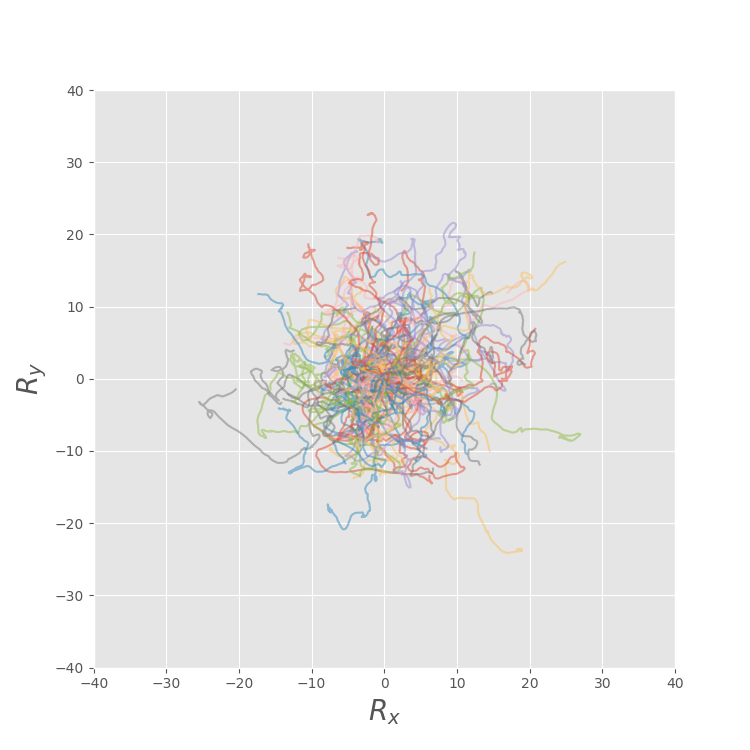

In [13]:
#2D plot

box = 80.
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_x$", fontsize=20)
ax.set_ylabel(r"$R_y$", fontsize=20)

plt.xlim(-box/2, box/2)
plt.ylim(-box/2, box/2)

for n in range(nump):
    #ax.plot(Rs[0, n, 0:nums], Rs[1, n, 0:nums], alpha=.5) #x-y plane
    ax.plot(Rs[0, n, 0:nums], Rs[2, n, 0:nums], alpha=.5) #x-z plane

plt.show()

<IPython.core.display.Javascript object>


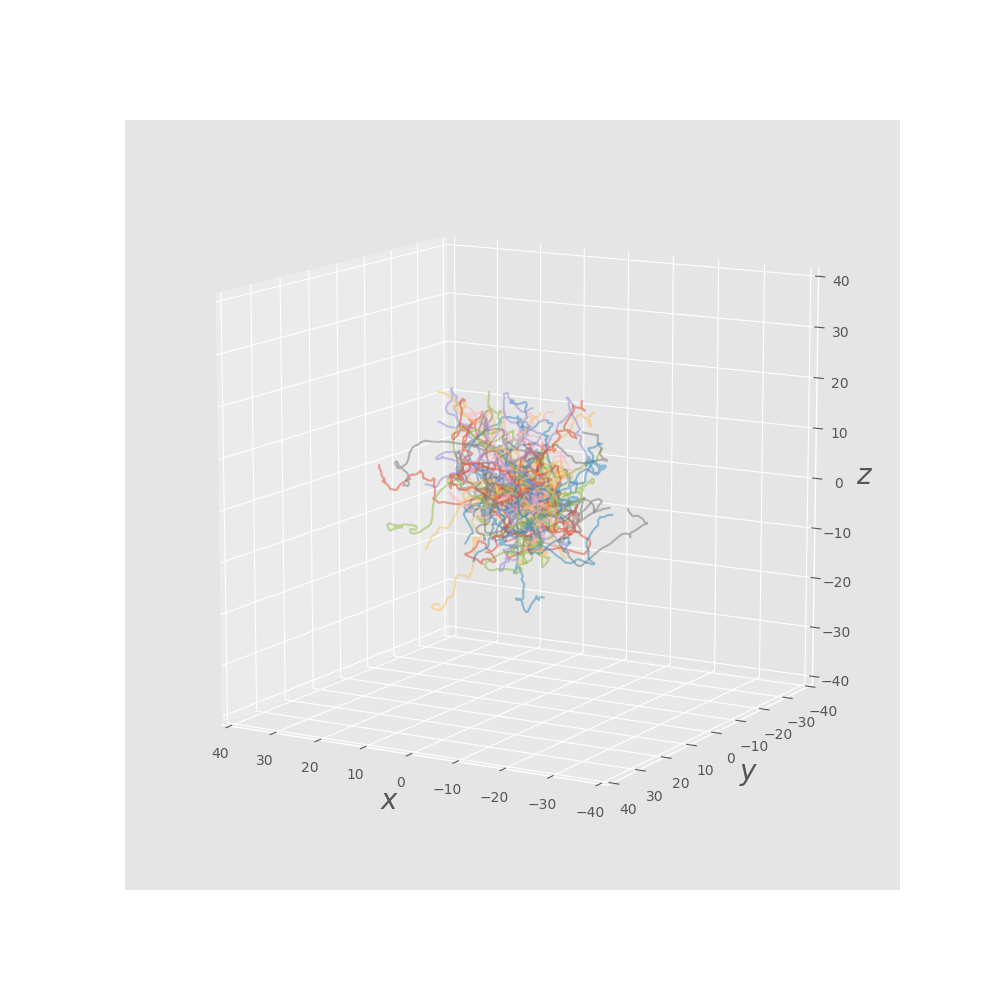

In [14]:
#3D plot 

box = 80.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.set_zlabel(r"$z$", fontsize=20)

ax.set_xlim(-box/2, box/2)
ax.set_ylim(-box/2, box/2)
ax.set_zlim(-box/2, box/2)

ax.view_init(elev=12, azim=120)
for n in range(nump):
    ax.plot(Rs[0, n, 0:nums], Rs[1, n, 0:nums], Rs[2, n, 0:nums], alpha=.5)

plt.show()